<a href="https://colab.research.google.com/github/RoniBustanai/project_2/blob/main/%D7%A4%D7%A8%D7%95%D7%99%D7%A7%D7%98%D7%95%D7%9F_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **פרויקטון 2**

# **EDA**

**נייבא ספריות מתאימות**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [50]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# **נוריד את מערך הנתונים שלנו**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


# **נקרא את הנתונים ונעבור עליהם**

In [5]:
data = r'hotel_bookings.csv'
df = pd.read_csv(data)

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **ננקה את הנתונים**

In [10]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [11]:
missing_percent(df)

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

**<p dir = "rtl"> יש יותר מדי ערכים חסרים ב company, לכן נוריד אותה</p>**

In [12]:
df = df.drop("company",axis = 1)

**<p dir = "rtl">כעת נתעסק בעמודה agent</p>**

In [13]:
df["agent"].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [14]:
df["agent"] = df["agent"].fillna(method='ffill')


**עכשיו נוציא כל שורה חסרה**

In [15]:
df = df.dropna()

**<p dir = "rtl">המטרה העיקרית שלנו היא העמודה "is_canceled", לכן נעבור עליה תחילה</p>**

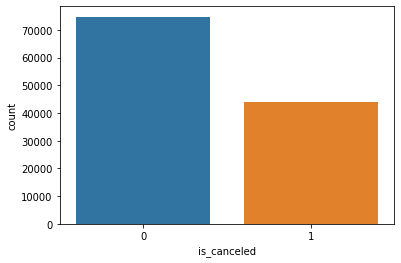

In [16]:
sns.countplot(x = df["is_canceled"])

**.ניתן לראות כי שיעור הביטול הוא די גבוה.**
**יש 40,000> מבוטלים אל מול 70,000> לא**

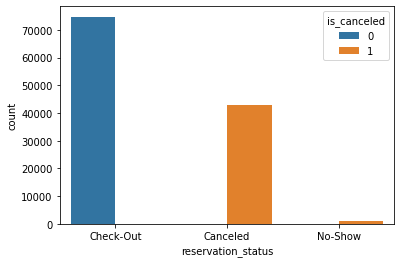

In [17]:
sns.countplot(x = df["reservation_status"], hue=df["is_canceled"])

(0.0, 500.0)

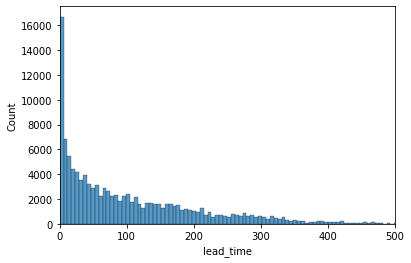

In [18]:
sns.histplot(x = df["lead_time"])
plt.xlim(0, 500)

**כעת נשווה את הביטולים בין שני מלונות**

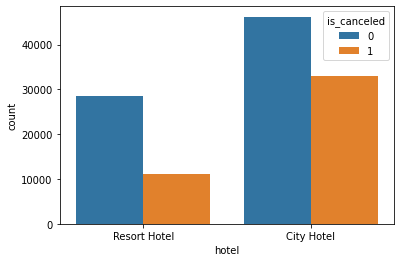

In [19]:
sns.countplot(x = df["hotel"], hue=df["is_canceled"])

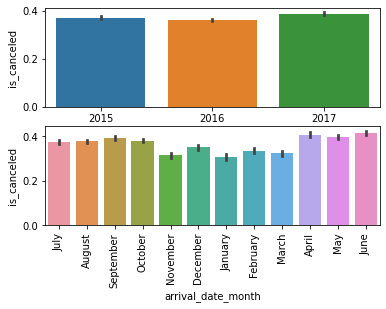

In [20]:
fig, ax = plt.subplots(2,1)
sns.barplot(x = df["arrival_date_year"], y = df["is_canceled"], ax = ax[0])
sns.barplot(x = df["arrival_date_month"], y = df["is_canceled"], ax = ax[1])
plt.xticks(rotation = 90)
plt.show()

**מכאן ניתן לראות שתאריכי ההגעה לא מהווים פרמטר קריטי, לכן אולי כדי לנו להוריד את עמודות אלו**

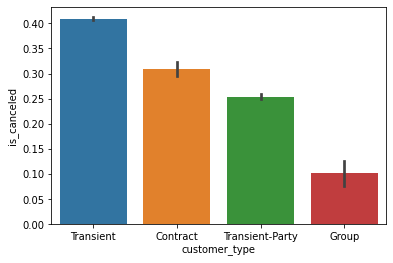

In [21]:
sns.barplot( x = df["customer_type"], y = df["is_canceled"])

**לסוג הלקוח יש חשיבות רבה ולכן אנחנו מוכרחים לקחת אותו בחשבון במודל שלנו**

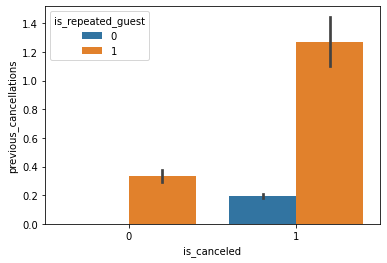

In [22]:
sns.barplot(x = df["is_canceled"], y = df["previous_cancellations"], hue = df["is_repeated_guest"])

**נסיק שתי מסקנות:**



1.   **לקוחות עם היסטוריה של ביטולים נוטים לבטל לעיתים תכופות יותר**
2.   **לקוחות חוזרים נוטים לבטל יותר**



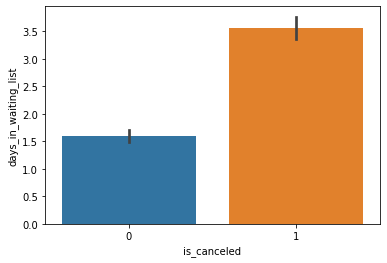

In [23]:
sns.barplot(x = df["is_canceled"], y = df["days_in_waiting_list"])

**ככל שמחכים יותר ברשימת ההמתנה, כך מבטלים יותר**

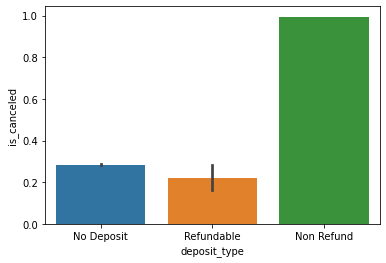

In [24]:
sns.barplot(y = df["is_canceled"], x = df["deposit_type"])



*   **תשלומים שאין עליהם החזר נוטים להתבטל יותר**
*   **הזמנות בלי חיוב או בעלי החזר הם פחות או יותר אותו הדבר**



In [25]:
month = pd.to_datetime(df["reservation_status_date"]).dt.month
year = pd.to_datetime(df["reservation_status_date"]).dt.year


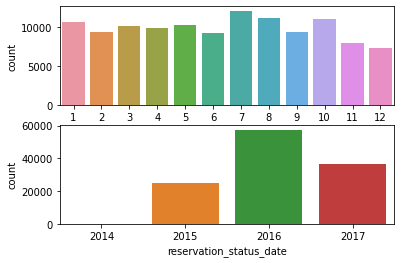

In [26]:
fig, ax = plt.subplots(2,1)
sns.countplot(x = month, ax = ax[0])
sns.countplot(x = year, ax = ax[1])

**תאריך ההזמנה מהווה גורם משמעותי**

   **ככל שמתקרבים לסוף השנה, הביטולים נוטים לרדת אחרי עלייה פתאומית ביולי**




<function matplotlib.pyplot.show>

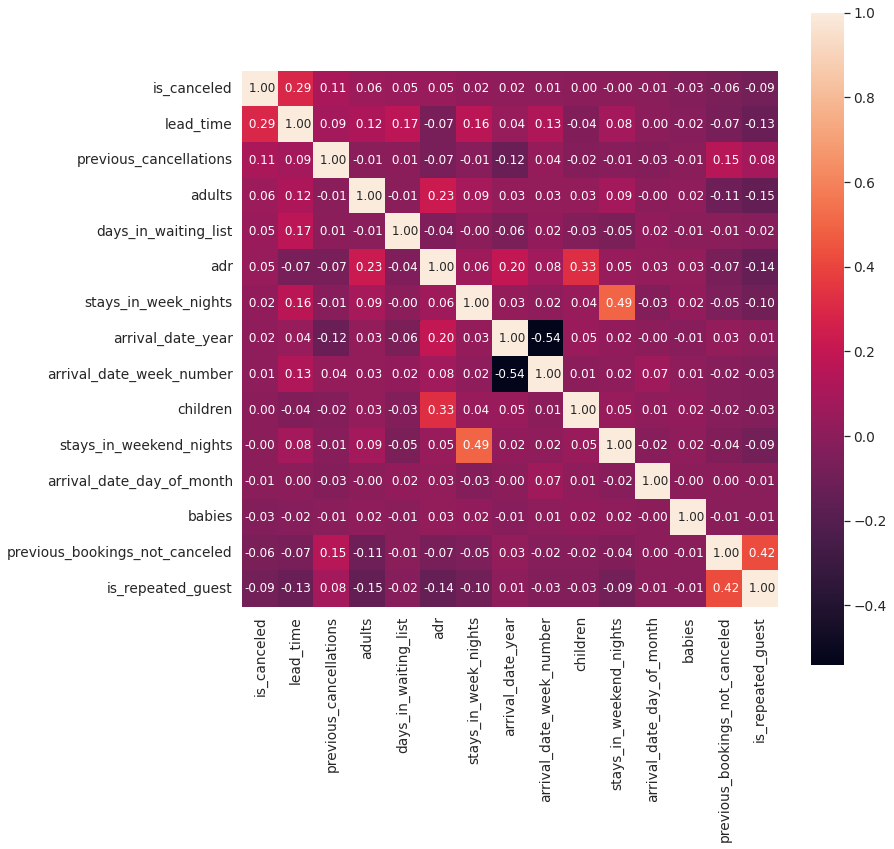

In [27]:
a = df.corr()
plt.figure(figsize=(12,12))
k = 15
cols = a.nlargest(k, 'is_canceled')['is_canceled'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, annot = True, square = True, fmt = ' .2f', annot_kws={'size' : 12}, yticklabels = cols.values, xticklabels = cols.values)
plt.show

In [28]:
cor = (df.corr()**2)**0.5
cor_mat = cor["is_canceled"].sort_values(ascending = True)
cor_mat * 100

stays_in_weekend_nights             0.264946
children                            0.474610
arrival_date_day_of_month           0.615946
arrival_date_week_number            0.746500
arrival_date_year                   1.638091
stays_in_week_nights                2.408820
babies                              3.252242
adr                                 4.617138
days_in_waiting_list                5.401352
previous_bookings_not_canceled      5.549528
adults                              5.837584
is_repeated_guest                   8.518345
agent                               9.548283
previous_cancellations             10.992081
booking_changes                    14.462872
required_car_parking_spaces        19.480240
total_of_special_requests          23.566061
lead_time                          29.209315
is_canceled                       100.000000
Name: is_canceled, dtype: float64

# **הנדוס הפרמטרים**

In [29]:
df.drop(['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 
         'booking_changes', 'reservation_status', 'country', 'days_in_waiting_list'], axis = 1, inplace = True)

In [30]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type', 'deposit_type',
       'agent', 'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date'],
      dtype='object')

# **בחירת תכונה**

**קודם כל נפצל את הנתונים לקטגורי ומספרי**

In [31]:
data = df.columns
catg = []
for i in data:
    if df[i].dtype == 'O':
        catg.append(i)
catg = df[catg]
catg

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03
5,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03
6,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-03
7,Resort Hotel,July,FB,Direct,Direct,C,No Deposit,Transient,2015-07-03
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017-09-06
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,2017-09-07
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,2017-09-07
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,2017-09-07


In [32]:
num = df.drop(catg, axis = 1)
num = num.drop("is_canceled", axis = 1)
num

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,98.00,0,1
5,14,27,1,0,2,2,0.0,0,0,0,0,240.0,98.00,0,1
6,0,27,1,0,2,2,0.0,0,0,0,0,240.0,107.00,0,0
7,9,27,1,0,2,2,0.0,0,0,0,0,303.0,103.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,104.40,0,0


In [33]:
num['lead_time'] = np.log(num['lead_time'] + 1)
num['arrival_date_week_number'] = np.log(num['arrival_date_week_number'] + 1)
num['arrival_date_day_of_month'] = np.log(num['arrival_date_day_of_month'] + 1)
num['adr'] = np.log(num['adr'] + 1)

In [34]:
catg["reservation_status_date"] = pd.to_datetime(catg["reservation_status_date"])

catg["year"] = catg["reservation_status_date"].dt.year
catg["month"] = catg["reservation_status_date"].dt.month
catg["day"] = catg["reservation_status_date"].dt.day

catg = catg.drop("reservation_status_date", axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [35]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

columns = catg.columns
for col in columns:
    catg[col] = label.fit_transform(catg[col])
catg

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
3,1,5,0,2,0,0,0,2,1,6,1
4,1,5,0,6,3,0,0,2,1,6,2
5,1,5,0,6,3,0,0,2,1,6,2
6,1,5,0,3,1,2,0,2,1,6,2
7,1,5,1,3,1,2,0,2,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...
119385,0,1,0,5,3,0,0,2,3,8,5
119386,0,1,0,6,3,4,0,2,3,8,6
119387,0,1,0,6,3,3,0,2,3,8,6
119388,0,1,0,6,3,0,0,2,3,8,6


In [36]:
X = catg.join(num).drop("adr",axis = 1)
y = df["is_canceled"]

**נפצל את התכונות**

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

# **יצירת המודל**

In [40]:
from tensorflow.keras import Sequential

In [42]:
from tensorflow.keras.layers import Dense

In [44]:
from tensorflow.keras.regularizers import l2

In [45]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1], 1), kernel_regularizer = l2()))
model.add(Dense(64, activation='relu', kernel_regularizer = l2()))
model.add(Dense(32, activation='relu', kernel_regularizer = l2()))
model.add(Dense(16, activation='relu', kernel_regularizer = l2()))
model.add(Dense(4, activation='relu', kernel_regularizer = l2()))
model.add(Dense(1))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25, 128)           256       
                                                                 
 dense_1 (Dense)             (None, 25, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 25, 32)            2080      
                                                                 
 dense_3 (Dense)             (None, 25, 16)            528       
                                                                 
 dense_4 (Dense)             (None, 25, 4)             68        
                                                                 
 dense_5 (Dense)             (None, 25, 1)             5         
                                                                 
Total params: 11,193
Trainable params: 11,193
Non-trai

In [47]:
from keras import backend as K
import tensorflow as tf


def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
from sklearn.metrics import r2_score
model.compile(optimizer='adam', loss='mse', metrics=[r2_keras])
model.fit(X_train, y_train, epochs=300)

Epoch 1/300
2490/2490 [==============================] - 16s 6ms/step - loss: 0.2333 - r2_keras: -24.9001
Epoch 2/300
2490/2490 [==============================] - 15s 6ms/step - loss: 0.2333 - r2_keras: -24.8538
Epoch 3/300
2397/2490 [===========================>..] - ETA: 0s - loss: 0.2333 - r2_keras: -24.8562

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('R2 Score on test set: ', score[1])
print('MSE on test set: ', score[0])